In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mtcars = pd.read_csv('mtcars.csv')

mtcars.sort_values(by=['mpg'], ascending=True,inplace=True)
#print(mtcars)
print("Najveća potrošnja:")
print()
print(mtcars.head(5).car)

print()

print("Automobili sa najmanjom potrošnjom i 8 cilindara:")
print()
print(mtcars[(mtcars.cyl == 8)].tail(3).car)

sixcil = mtcars[(mtcars.cyl == 6)]
average = np.average(sixcil.mpg)
average = round(average, 2)
print()
print(f"Prosječna potrošnja auta sa 6 cilindara je: {average}")

fourcil = mtcars[(mtcars.cyl == 4) & mtcars["wt"].between(2, 2.2) ]
average_fourcil = np.average(fourcil.mpg)
print()
print(f"Srednja potrošnja automobila s 4 cilindra mase između 2000 i 2200 lbs je: {average_fourcil}")

am = mtcars.groupby('am').count()
manual = am.car[1]
automatic = am.car[0]
print()
print(f"Broj auta sa ručnim mjenjačem: {manual}")
print(f"Broj auta sa automatskim mjenjačem: {automatic}")

automatic_power = mtcars[(mtcars.am == 0) & (mtcars.hp > 100)]
automatic_power = automatic_power.groupby('am').count()
print()
print(f"Broj automobila sa automaskim mjenjačem i snagom većom od 100: {automatic_power.car[0]}")


mtcars['kg'] = (mtcars["wt"] * 1000) * 0.45359237
print()
print(mtcars[['car','kg']]) 




FileNotFoundError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


am
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

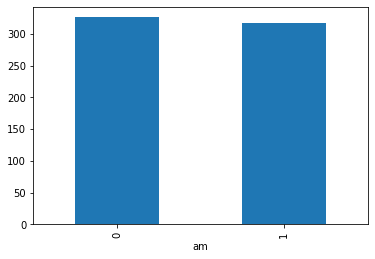

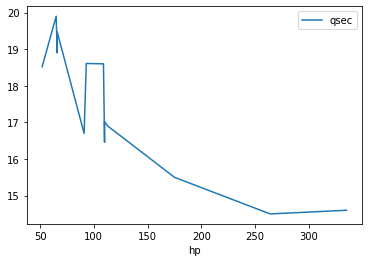

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mtcars = pd.read_csv('mtcars.csv')
mtcars.sort_values(by=['cyl'], ascending=True,inplace=True)
plt.figure()
mtcars.plot.bar(x="cyl",y="mpg",rot=0)

plt.figure()
mtcars.boxplot(column=['wt'],by="cyl")

plt.figure()
am = mtcars.groupby('am')['mpg'].sum()
am.plot.bar(x="am",y="mpg")

plt.figure
mtcars.sort_values(by=['hp'], ascending=False,inplace=True)
am2 = mtcars.groupby('am')['hp','qsec']
am2.plot(x="hp",y="qsec")

21   2017-01-21 23:00:00+00:00
20   2017-01-20 23:00:00+00:00
29   2017-01-29 23:00:00+00:00
Name: vrijeme, dtype: datetime64[ns, UTC]


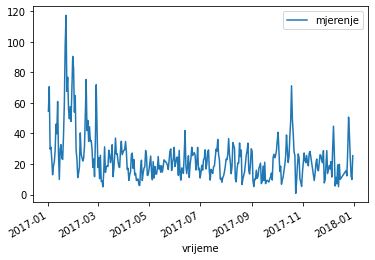

In [2]:
import urllib.request
import pandas as pd
import xml.etree.ElementTree as ET

# url that contains valid xml file:
url = 'http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=4&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017'

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
children=list(root)
while True:
    
    try:
        obj = list(children[i])
    except:
        break
    
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1

df.vrijeme = pd.to_datetime(df["vrijeme"],utc=True)
df.plot(y='mjerenje', x='vrijeme');

# add date month and day designator
df['month'] = pd.to_datetime(df['vrijeme']).dt.month
df['dayOfweek'] = pd.to_datetime(df['vrijeme']).dt.dayofweek

df.sort_values(by=['mjerenje'], ascending=False,inplace=True)
print(df.head(3).vrijeme)


    mjerenje                   vrijeme  month  dayOfweek
21   117.415 2017-01-21 23:00:00+00:00      1          5
20    97.902 2017-01-20 23:00:00+00:00      1          4
29    90.513 2017-01-29 23:00:00+00:00      1          6
30    82.796 2017-01-30 23:00:00+00:00      1          0
23    76.849 2017-01-23 23:00:00+00:00      1          0
..       ...                       ...    ...        ...
302    5.326 2017-10-29 23:00:00+00:00     10          6
245    5.226 2017-09-02 22:00:00+00:00      9          5
342    5.183 2017-12-12 23:00:00+00:00     12          1
65     5.039 2017-03-06 23:00:00+00:00      3          0
295    0.765 2017-10-22 22:00:00+00:00     10          6

[354 rows x 4 columns]
-----------------------------------------------------------------

Datumi s najvecom koncentracijom PM10

21   2017-01-21 23:00:00+00:00
20   2017-01-20 23:00:00+00:00
29   2017-01-29 23:00:00+00:00
Name: vrijeme, dtype: datetime64[ns, UTC]
---------------------------------------------------

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


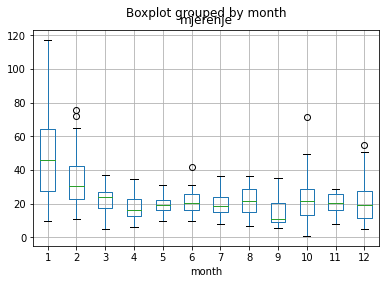

-----------------------------------------------------------------
    mjerenje                   vrijeme  month  dayOfweek
21   117.415 2017-01-21 23:00:00+00:00      1          5
20    97.902 2017-01-20 23:00:00+00:00      1          4
29    90.513 2017-01-29 23:00:00+00:00      1          6
30    82.796 2017-01-30 23:00:00+00:00      1          0
23    76.849 2017-01-23 23:00:00+00:00      1          0
..       ...                       ...    ...        ...
232   10.222 2017-08-20 22:00:00+00:00      8          6
223   10.165 2017-08-11 22:00:00+00:00      8          4
13     9.907 2017-01-13 23:00:00+00:00      1          4
224    8.326 2017-08-12 22:00:00+00:00      8          5
231    6.557 2017-08-19 22:00:00+00:00      8          5

[62 rows x 4 columns]


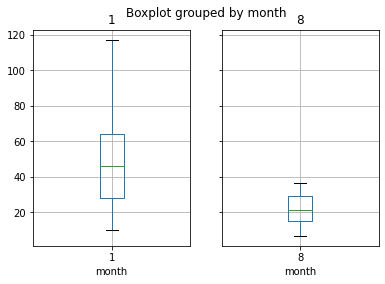

-----------------------------------------------------------------


KeyError: ignored

In [22]:
print(df)
print('-----------------------------------------------------------------')
print("\nDatumi s najvecom koncentracijom PM10\n")
print(df.sort_values(by=['mjerenje'], ascending=False).head(3)['vrijeme'])
print('-----------------------------------------------------------------')
df.boxplot(by='month',column='mjerenje')
plt.show()
print('-----------------------------------------------------------------')
print( df[(df['month'] == 8) | (df['month'] == 1)])
 
df[(df['month'] == 8) | (df['month'] == 1)].groupby(by='month').boxplot(by='month',column='mjerenje')
plt.show()
print('-----------------------------------------------------------------')
df.loc[df['day'] >= 5, 'weekend'] = True
df.loc[df['day'] < 5, 'weekend'] = False
print(df)
 
df[(df['weekend'] == True) | (df['weekend'] == False)].boxplot(by='weekend',column='mjerenje')
 
plt.show()